# Simple plotting
[http://www.obihiro.ac.jp/~suzukim/masuda/octave/html3/octave_90.html](http://www.obihiro.ac.jp/~suzukim/masuda/octave/html3/octave_90.html)

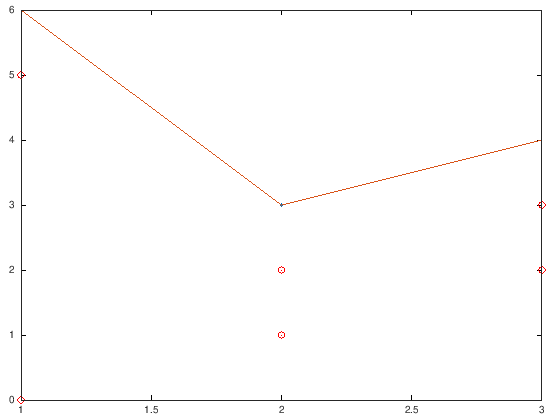

In [11]:
x = 2;
y = 3;
plot(x, y)
hold on
plot([1 2 3], [6 3 4])
plot([1 2 3], [5 2 3; 0 1 2]', "or")

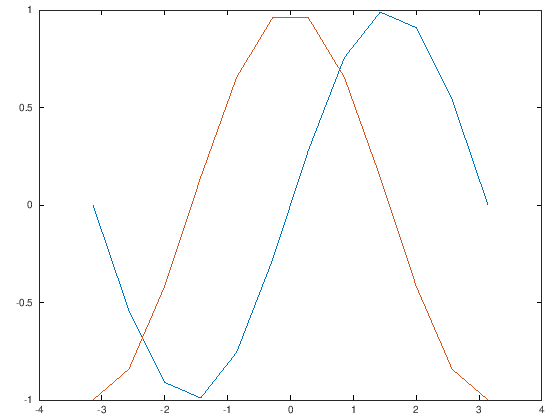

In [20]:
# let's plot a function
xs = -pi:0.01:pi;
xs = linspace(-pi, pi, 12); # many different x values
ys = sin(xs); # sin is applied to each element
plot(xs, ys)
plot(xs, ys, xs, cos(xs)) # plot two function

# Solving equations
## A system of linear equations

$$2x + 3y = 14$$
$$3x - 4y = 4$$

In [24]:
A = [2 3; 3 -4]
B = [14; 4]
# X = [x; y]
# A * X = B     =>    inv(A) * A * X = inv(A) * B  => X = inv(A) * B
X = A \ B # inv(A) * B
#       A / B = A * inv(B)

A =


   2   3


   3  -4


B =


   14


    4


X =


   4.0000


   2.0000


## Polynomial equations
$$ p(x) = x^5 - 3x^4 -7x^2 + 3 = 0 $$

In [28]:
# roots function
roots([1, -3, 0, -7, 0, 3]) # 1 * x^5 - 3 * x^4 + 0 * x^3 + ...
roots([1 0 -4])    # x^2 - 4

ans =


   3.53960 + 0.00000i


  -0.27725 + 1.48718i


  -0.27725 - 1.48718i


   0.61605 + 0.00000i


  -0.60115 + 0.00000i


ans =


  -2.0000


   2.0000


## How to describe functions
Imagine, we want to solve $x \log(x) = 2$. There is no closed-form solution for this equation.

We will try to find a root of a function $f(x) = x \log(x) - 2$

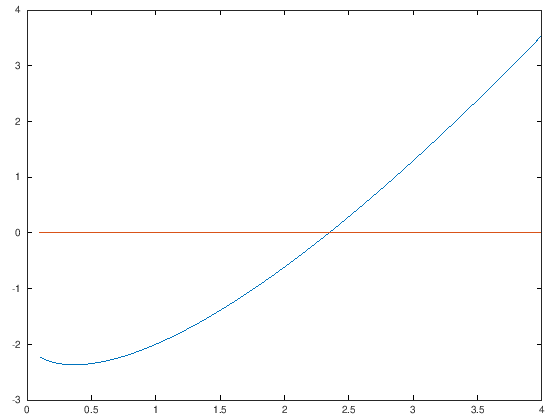

In [35]:
function y = f(x)
  y = x .* log(x) - 2;  # .* makes it possible to call f for matrices
endfunction

xs = linspace(0.1, 4, 100);
plot(xs, f(xs), xs, zeros(1, length(xs)))  # xs and 0 just draws the x axis

In [4]:
# anonymous function
g = @(x) x .* log(x) - 2 # @(args) expr (cf. lambda-functions)
g(2.5)
g(2.4)
g(2.3)

g =


@(x) x .* log (x) - 2


ans =  0.29073


ans =  0.10112


ans = -0.084309


In [40]:
# how to find a root of a function
fzero(g, [2 3])  # we know that g(2) < 0, and g(3) > 0, so we know that there is a root somewhere in between
fzero(g, 2) # it creates the segment by itself

ans =  2.3458


ans =  2.3458


# Arbitrary equations
fsolve function is used for searching for roots of arbitrary functions, and even for systems of functions



In [8]:
# at first, let's use it for the same function 'g'
fsolve(g, 2) # give a function and a point, where to start searching for a root
fsolve(@(x) sin(x), 1) # if we start from 1, we go the the root 0
fsolve(@(x) sin(x), 2) # if we start from 2, we go to the other root
fsolve(@sin, 2) # built-in functions can became lambda functions just by prepending @

ans =  2.3458


ans = 0


ans =  3.1416


$$ x + sin(y) = 2 $$
$$ cos(x) + y = 2 $$

`F([x; y]) -> [xx; yy]`

In [17]:
# F([x; y]) = [x + sin(y) - 2; cos(x) + y - 2].          F([x; y]) = [0; 0]

function v = F(u)
    #u = [x; y]
    #v = [x + sin(y) - 2; cos(x) + y - 2]
    x = u(1);
    y = u(2);
    v = [x + sin(y) - 2; cos(x) + y - 2];
endfunction

FF = @(u) [u(1) + sin(u(2)) - 2; cos(u(1)) + u(2) - 2]; # the same in lambda form

fsolve(FF, [0 0])
fsolve(FF, [1 1])
fsolve(FF, [-10 10])
fsolve(FF, [10 10])
fsolve(FF, [10 -10])

fsolve(@F, [0 0]) #if you want to call an existing named function

ans =


   1.0056   1.4645


ans =


   1.0056   1.4645


ans =


   1.0056   1.4645


ans =


   1.0056   1.4645


ans =


   1.0056   1.4645


ans =


   1.0056   1.4645
